# MNIST Digits Classification

## Getting our workspace ready

In [ ]:
# Importing necessary tools

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix

#Setting the random seed

np.random.seed(42)

## Importing the data

In [ ]:
from keras.datasets import mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualizing the data

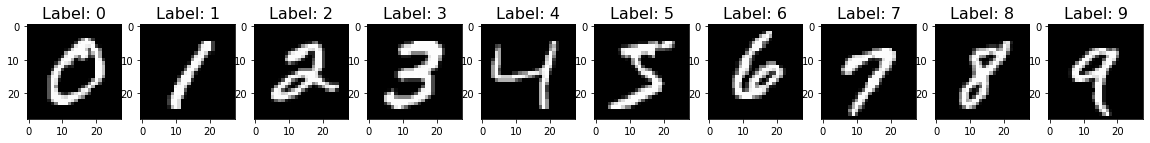

In [ ]:
num_classes = 10

# Setup the figure and create subplots(1 row , 10 columns)
fig,ax = plt.subplots(1,num_classes,figsize=(20,20))
# Turn gird lines off 
plt.grid(False)
#Loop through num_classes (for displaying 10 images)
for i in range(num_classes):
  # Display an image
  sample = X_train[y_train==i][0]
  ax[i].imshow(sample,cmap = 'gray')
  #Add the image label as title
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


## One Hot Encoding the Labels

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Getting the data ready

In [ ]:
# Normalize Data (get it in the range of 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Reshape Data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape

(60000, 784)

## Create Model - Fully Connected Neural Network

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 512
epochs=10
model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 4ms/step - loss: 0.5895 - accuracy: 0.8314
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2207 - accuracy: 0.9359
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1602 - accuracy: 0.9527
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1288 - accuracy: 0.9623
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1053 - accuracy: 0.9688
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0881 - accuracy: 0.9732
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0754 - accuracy: 0.9770
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0682 - accuracy: 0.9796
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0587 - accuracy: 0.9824
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0516 - accuracy: 0.9849

## Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0748 - accuracy: 0.9773
Test Loss: 0.07479603588581085, Test Accuracy: 0.9772999882698059


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[1.8350501e-07 2.0697128e-06 1.3339532e-05 ... 9.9989474e-01
  2.1633857e-06 5.8965684e-06]
 [3.4865415e-08 2.7427306e-05 9.9996340e-01 ... 8.8863787e-09
  2.7995748e-07 1.2918819e-10]
 [6.6371686e-06 9.9712569e-01 1.2356733e-04 ... 1.1761180e-03
  6.0027768e-04 3.3426018e-06]
 ...
 [2.9050991e-09 2.8602848e-08 1.1695849e-09 ... 2.7864908e-06
  2.4429946e-06 1.4553873e-05]
 [4.4269974e-08 2.0125132e-07 1.8453088e-09 ... 6.0012741e-09
  1.4843264e-05 2.8021327e-09]
 [6.1244627e-08 7.6947861e-09 1.2784693e-08 ... 7.9481378e-12
  4.6689777e-08 5.5678889e-10]]
[7 2 1 ... 4 5 6]


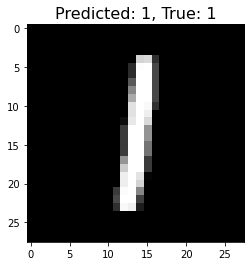

In [ ]:
# Single Example
random_idx = np.random.choice(len(X_test))
x_sample = X_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

## Confusion Matrix

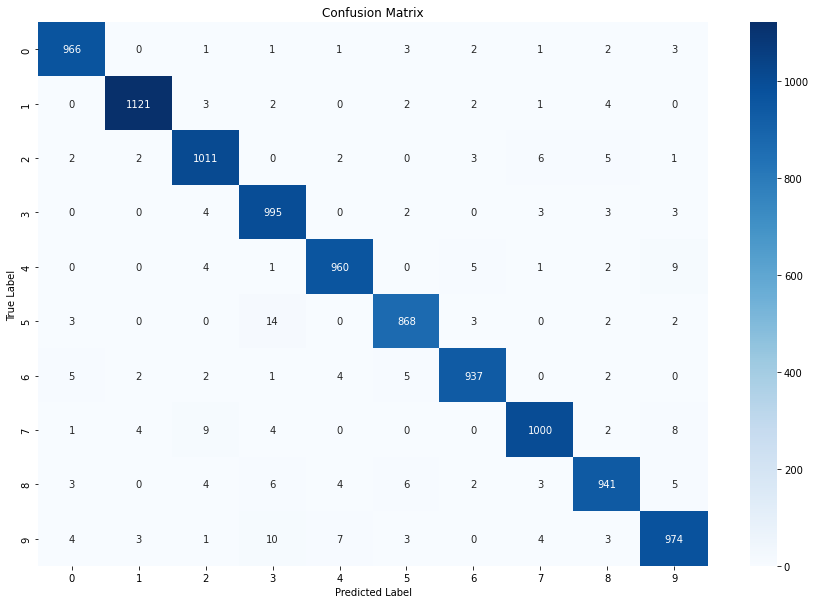

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

## Investigate Some Errors

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = X_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

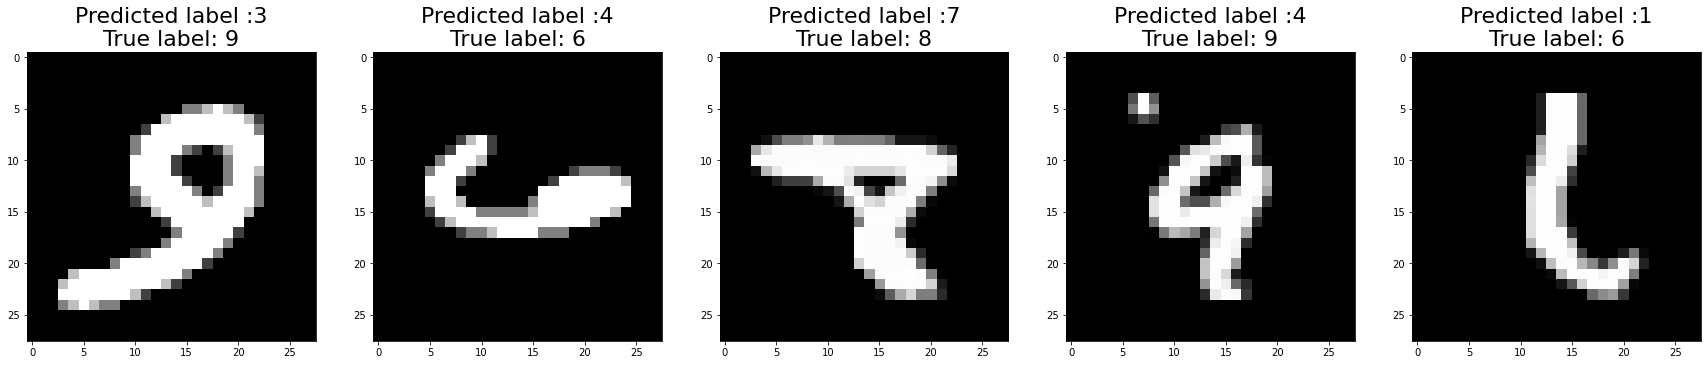

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
